In [1]:
import requests
import pandas as pd


api_root_delinquance = "https://tabular-api.data.gouv.fr/api/resources/"
ID_delinquance = "3f51212c-f7d2-4aec-b899-06be6cdd1030"
filtre = "?CODGEO_2024__greater=75101&CODGEO_2024__less=75120." # Filtre pour ne sélectionner que les arrondissements de Paris 
url_api_delinquance = api_root_delinquance + ID_delinquance + "/data/" + filtre 

print(url_api_delinquance)


def recuperation_data(url_api):
    df = []  
    current_url = url_api

    while current_url:
        req = requests.get(current_url)
        wb = req.json()
        df.extend(wb['data'])
        current_url = wb["links"].get("next")
    return pd.DataFrame(df)

df_delinquance = recuperation_data(url_api_delinquance)
df_delinquance.head() 

https://tabular-api.data.gouv.fr/api/resources/3f51212c-f7d2-4aec-b899-06be6cdd1030/data/?CODGEO_2024__greater=75101&CODGEO_2024__less=75120.


,__id,CODGEO_2024,annee,classe,unité.de.compte,valeur.publiée,faits,tauxpourmille,complementinfoval,complementinfotaux,POP,millPOP,LOG,millLOG
0,409781,75101,16,Coups et blessures volontaires,victime,diff,271.0,"1,66748707851341e+01",NaN,NaN,16252,16,"1,37973242421027e+04",16
1,409782,75101,16,Coups et blessures volontaires intrafamiliaux,victime,diff,33.0,"2,03051932069899e+00",NaN,NaN,16252,16,"1,37973242421027e+04",16
2,409783,75101,16,Autres coups et blessures volontaires,victime,diff,238.0,"1,46443514644351e+01",NaN,NaN,16252,16,"1,37973242421027e+04",16
3,409784,75101,16,Violences sexuelles,victime,diff,93.0,"5,72237263106079e+00",NaN,NaN,16252,16,"1,37973242421027e+04",16
4,409785,75101,16,Vols avec armes,infraction,diff,28.0,"1,72286487816884e+00",NaN,NaN,16252,16,"1,37973242421027e+04",16


In [2]:
df_delinquance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   __id                2240 non-null   int64  
 1   CODGEO_2024         2240 non-null   object 
 2   annee               2240 non-null   int64  
 3   classe              2240 non-null   object 
 4   unité.de.compte     2240 non-null   object 
 5   valeur.publiée      2240 non-null   object 
 6   faits               2228 non-null   float64
 7   tauxpourmille       2240 non-null   object 
 8   complementinfoval   12 non-null     float64
 9   complementinfotaux  12 non-null     float64
 10  POP                 2240 non-null   int64  
 11  millPOP             2240 non-null   int64  
 12  LOG                 2240 non-null   object 
 13  millLOG             2240 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 245.1+ KB


In [3]:
valeurs_uniques = df_delinquance['classe'].unique()
print("Valeurs uniques dans la colonne 'classe':")
print(valeurs_uniques)

Valeurs uniques dans la colonne 'classe':
['Coups et blessures volontaires'
 'Coups et blessures volontaires intrafamiliaux'
 'Autres coups et blessures volontaires' 'Violences sexuelles'
 'Vols avec armes' 'Vols violents sans arme'
 'Vols sans violence contre des personnes' 'Cambriolages de logement'
 'Vols de véhicules' 'Vols dans les véhicules'
 "Vols d'accessoires sur véhicules"
 'Destructions et dégradations volontaires' 'Trafic de stupéfiants'
 'Usage de stupéfiants']


In [4]:
df_delinquance['arrondissement'] = df_delinquance['CODGEO_2024'].astype(str).str[-2:]
df_delinquance = df_delinquance[df_delinquance['classe'] != 'Coups et blessures volontaires intrafamiliaux']
df_delinquance['tauxpourmille'] = df_delinquance['tauxpourmille'].str.replace(',', '.', regex=False)
df_delinquance['tauxpourmille'] = df_delinquance['tauxpourmille'].str.replace('+', '', regex=False)  
df_delinquance['tauxpourmille'] = pd.to_numeric(df_delinquance['tauxpourmille'], errors='coerce')

df_delinquance.head(14)


,__id,CODGEO_2024,annee,classe,unité.de.compte,valeur.publiée,faits,tauxpourmille,complementinfoval,complementinfotaux,POP,millPOP,LOG,millLOG,arrondissement
0,409781,75101,16,Coups et blessures volontaires,victime,diff,271.0,16.674871,NaN,NaN,16252,16,"1,37973242421027e+04",16,01
2,409783,75101,16,Autres coups et blessures volontaires,victime,diff,238.0,14.644351,NaN,NaN,16252,16,"1,37973242421027e+04",16,01
3,409784,75101,16,Violences sexuelles,victime,diff,93.0,5.722373,NaN,NaN,16252,16,"1,37973242421027e+04",16,01
4,409785,75101,16,Vols avec armes,infraction,diff,28.0,1.722865,NaN,NaN,16252,16,"1,37973242421027e+04",16,01
5,409786,75101,16,Vols violents sans arme,infraction,diff,584.0,35.934039,NaN,NaN,16252,16,"1,37973242421027e+04",16,01
6,409787,75101,16,Vols sans violence contre des personnes,victime entendue,diff,6689.0,411.580113,NaN,NaN,16252,16,"1,37973242421027e+04",16,01
7,409788,75101,16,Cambriolages de logement,infraction,diff,134.0,9.712028,NaN,NaN,16252,16,"1,37973242421027e+04",16,01
8,409789,75101,16,Vols de véhicules,véhicule,diff,128.0,7.875954,NaN,NaN,16252,16,"1,37973242421027e+04",16,01
9,409790,75101,16,Vols dans les véhicules,véhicule,diff,295.0,18.151612,NaN,NaN,16252,16,"1,37973242421027e+04",16,01
10,409791,75101,16,Vols d'accessoires sur véhicules,véhicule,diff,24.0,1.476741,NaN,NaN,16252,16,"1,37973242421027e+04",16,01


In [5]:
delinquance_par_arrondissement = df_delinquance.groupby(['arrondissement']).agg({'tauxpourmille': 'sum'}).reset_index()
delinquance_par_arrondissement


,arrondissement,tauxpourmille
0,01,5196.200318
1,02,2146.200884
2,03,1312.664131
3,04,1789.615948
4,05,912.244964
5,06,1170.924386
6,07,980.394686
7,08,3081.655488
8,09,1685.968091
9,10,1632.879669


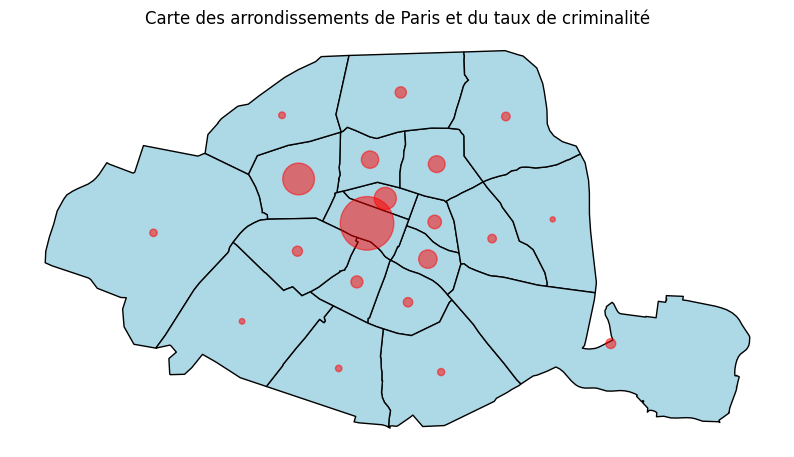

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from cartiflette import carti_download

arr_borders = carti_download(
    crs=4326,
    values=["75"],
    borders="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="geojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

arr_borders = arr_borders.to_crs(epsg=3857)

arr_borders['centroid'] = arr_borders.geometry.centroid
arr_borders['arrondissement'] = arr_borders['INSEE_COG'].str[-2:]  

fig, ax = plt.subplots(figsize=(10, 10))
arr_borders.plot(ax=ax, color='lightblue', edgecolor='black')  
arr_borders_sorted = arr_borders.sort_values(by='arrondissement')
arr_borders_sorted['tauxpourmille'] = delinquance_par_arrondissement['tauxpourmille'].values


for _, row in arr_borders_sorted.iterrows():
    arrondissement = row['arrondissement']
    taux = row['tauxpourmille']

    if taux > 0: 
        x, y = row['centroid'].x, row['centroid'].y
        radius = taux / 5  
        circle = plt.Circle((x, y), radius, color='red', alpha=0.5, zorder=10)
        ax.add_artist(circle)


ax.set_aspect('equal') 

ax.set_title("Carte des arrondissements de Paris et du taux de criminalité")
ax.set_axis_off()  

plt.show()


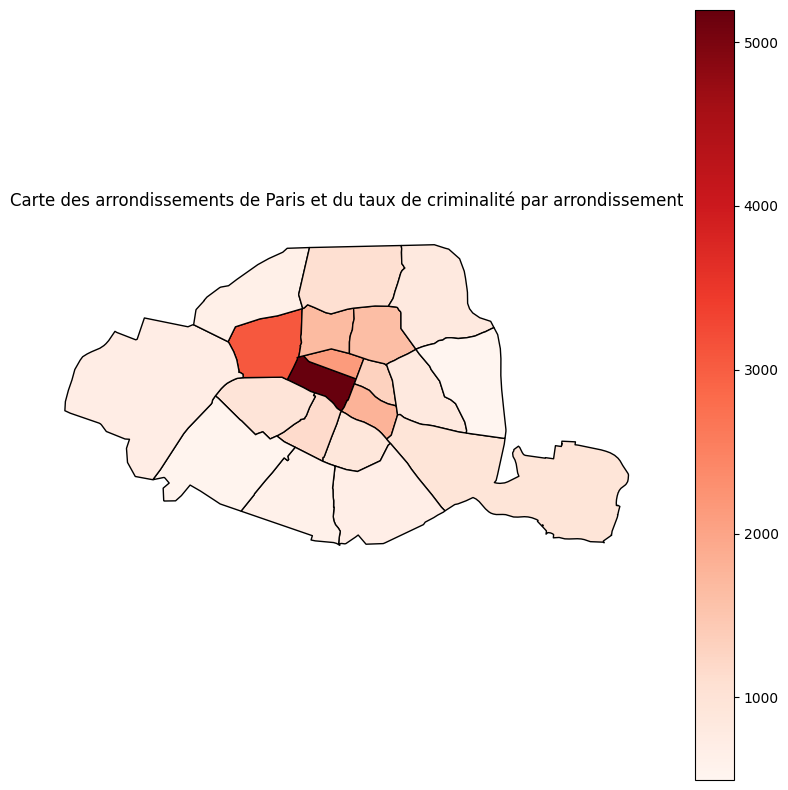

In [7]:
arr_borders = arr_borders.to_crs(2154)  

arr_borders['arrondissement'] = arr_borders['INSEE_COG'].str[-2:]  
arr_borders_sorted = arr_borders.sort_values(by='arrondissement')
arr_borders_sorted['tauxpourmille'] = delinquance_par_arrondissement['tauxpourmille'].values


fig, ax = plt.subplots(figsize=(10, 10))
aplat = arr_borders_sorted.plot(
    column="tauxpourmille",  
    cmap="Reds",        
    legend=True,             
    edgecolor="black",       
    ax=ax
)

aplat.set_axis_off()  
aplat.set_title("Carte des arrondissements de Paris et du taux de criminalité par arrondissement", fontsize=12)

plt.show()
